# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [4]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
import sklearn

/tmp/ipykernel_91/449187645.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [6]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [7]:
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)


N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [8]:
Fisher.fit(X_Train,y_Train)


LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

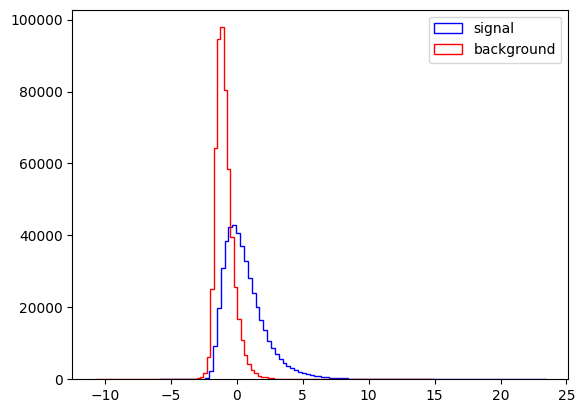

In [11]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

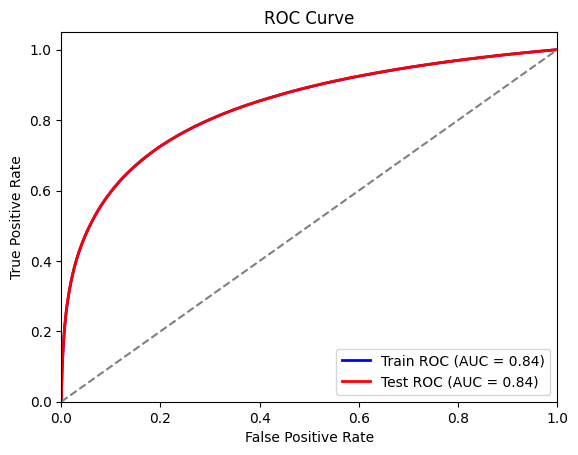

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities for both training and test samples
y_train_pred_proba = Fisher.predict_proba(X_Train)[:, 1]
y_test_pred_proba = Fisher.predict_proba(X_Test)[:, 1]

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for both samples
fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_pred_proba)

# Compute Area Under the ROC Curve (AUC) for both samples
auc_train = roc_auc_score(y_Train, y_train_pred_proba)
auc_test = roc_auc_score(y_Test, y_test_pred_proba)

# Plot ROC curves
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC (AUC = %0.2f)' % auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [12]:
# Train Fisher classifier using raw features
Fisher_raw = DA.LinearDiscriminantAnalysis()
Fisher_raw.fit(X_Train, y_Train)

# Compute predicted probabilities for raw features
y_raw_pred_proba = Fisher_raw.predict_proba(X_Test)[:, 1]

# Compute ROC curve and AUC for raw features
fpr_raw, tpr_raw, _ = roc_curve(y_Test, y_raw_pred_proba)
auc_raw = roc_auc_score(y_Test, y_raw_pred_proba)

# Train Fisher classifier using engineered features
# Assuming you have already engineered your features and stored them in a DataFrame called 'X_Engineered'
Fisher_engineered = DA.LinearDiscriminantAnalysis()
Fisher_engineered.fit(X_Engineered, y_Train)

# Compute predicted probabilities for engineered features
y_engineered_pred_proba = Fisher_engineered.predict_proba(X_Engineered)[:, 1]

# Compute ROC curve and AUC for engineered features
fpr_engineered, tpr_engineered, _ = roc_curve(y_Test, y_engineered_pred_proba)
auc_engineered = roc_auc_score(y_Test, y_engineered_pred_proba)

# Train Fisher classifier using both raw and engineered features
X_combined = pd.concat([X_Train, X_Engineered], axis=1)
Fisher_combined = DA.LinearDiscriminantAnalysis()
Fisher_combined.fit(X_combined, y_Train)

# Compute predicted probabilities for combined features
y_combined_pred_proba = Fisher_combined.predict_proba(X_combined)[:, 1]

# Compute ROC curve and AUC for combined features
fpr_combined, tpr_combined, _ = roc_curve(y_Test, y_combined_pred_proba)
auc_combined = roc_auc_score(y_Test, y_combined_pred_proba)

# Plot ROC curves for comparison
plt.figure()
plt.plot(fpr_raw, tpr_raw, color='blue', lw=2, label='Raw Features (AUC = %0.2f)' % auc_raw)
plt.plot(fpr_engineered, tpr_engineered, color='red', lw=2, label='Engineered Features (AUC = %0.2f)' % auc_engineered)
plt.plot(fpr_combined, tpr_combined, color='green', lw=2, label='Combined Features (AUC = %0.2f)' % auc_combined)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fisher Classifier Performance Comparison')
plt.legend(loc="lower right")
plt.show()

NameError: name 'X_Engineered' is not defined

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def compare_classifiers(classifier, X_train, y_train, X_test, y_test, label):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Compute predicted probabilities
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (label, auc))

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [14]:
def compute_max_significance(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Compute predicted probabilities
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    
    # Compute the number of signal and background events
    N_S = sum(y_test)
    N_B = len(y_test) - N_S
    
    # Compute the maximal significance
    significance = N_S / np.sqrt(N_S + N_B)
    
    return significance

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

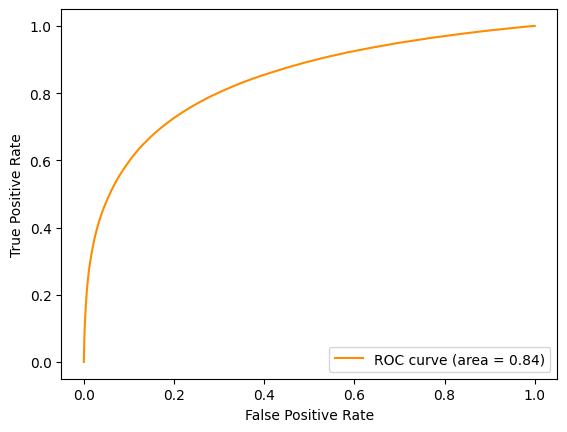

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Compute predicted classes
y_pred = Fisher.predict(X_Test)

# Compute precision, recall, f1-score, and accuracy
precision = precision_score(y_Test, y_pred)
recall = recall_score(y_Test, y_pred)
f1 = f1_score(y_Test, y_pred)
accuracy = accuracy_score(y_Test, y_pred)

# Compute the maximal significance
significance = compute_max_significance(Fisher, X_Train, y_Train, X_Test, y_Test)

# Create a table
table = [["Metric", "Value"],
         ["AUC", roc_auc],
         ["Precision", precision],
         ["Recall", recall],
         ["F1-score", f1],
         ["Accuracy", accuracy],
         ["Max Significance", significance]]

# Display the table
display(HTML(tabulate.tabulate(table, tablefmt='html')))

NameError: name 'roc_auc' is not defined